In [1]:
## Pre-setting
# automatically adjust the width of the notebook code cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# if one module is changed, this line will automatically reload that module
%load_ext autoreload
%autoreload 2

# display the figure in the notebook
%matplotlib inline

# To change the font size in acrobat
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
## Add path
import os
import sys
# src_dir = ''
# if src_dir not in sys.path:
#     sys.path.insert(0, src_dir)
    
# src_dir

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/1.75#(np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.titlesize':8,
          'axes.labelsize': 10,
#           'text.fontsize': 10,
          'legend.fontsize': 10,
#           'figtext.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          
#           'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False
         }
plt.rcParams.update(params)


/home/martin/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [5]:
cmap = 'tab10'
ccolors = plt.get_cmap(cmap)(np.arange(10, dtype=int))

set_blue = ccolors[0]
set_orange = ccolors[1]
set_green = ccolors[2]
set_gray = ccolors[7]

## get all data

In [6]:
N_s = 1000

corpus_name = 't20NewsGroup_topic_doc_no_short'
plot_data_en_folder_file_path = os.path.abspath(os.path.join(os.pardir,  'output', '%s_stopword-statistics_Ns%s.csv'%(corpus_name,N_s)))

corpus_name = 'multi_lg_portuguese_dw_general_v2'
plot_data_pt_folder_file_path = os.path.abspath(os.path.join(os.pardir,  'output', '%s_stopword-statistics_Ns%s.csv'%(corpus_name,N_s)))

corpus_name = 'multi_lg_chinese_sogou'
plot_data_cn_folder_file_path = os.path.abspath(os.path.join(os.pardir,  'output', '%s_stopword-statistics_Ns%s.csv'%(corpus_name,N_s)))

corpus_name = 'multi_lg_german'
plot_data_de_folder_file_path = os.path.abspath(os.path.join(os.pardir,  'output', '%s_stopword-statistics_Ns%s.csv'%(corpus_name,N_s)))

In [7]:
all_df_en = pd.read_csv(plot_data_en_folder_file_path,index_col=0)

all_df_pt = pd.read_csv(plot_data_pt_folder_file_path,index_col=0)

all_df_cn = pd.read_csv(plot_data_cn_folder_file_path,index_col=0)

all_df_de = pd.read_csv(plot_data_de_folder_file_path,index_col=0)

## en: plot data 

In [8]:
all_df_en = all_df_en.sort_values(by='N', ascending=0)
all_df_en['word_type'] = all_df_en.index

word_count_array_en = all_df_en.N.values

info_mean_array_en = all_df_en['H-tilde'].values
info_real_array_en = all_df_en['H'].values
yerr_array_en = all_df_en['H-tilde_std'].values * 5

D = 18803
upper_limit_en = np.log2(D)

In [9]:
chosen_word_list_en = ['cancer','information', 'thanks', 'article', 'the']

chosen_word_dict_en = {}

for i in chosen_word_list_en:

    chosen_word_dict_en[i] = {
        'word_count': float(all_df_en[all_df_en['word_type']==i]['N']),
        'info_real': float(all_df_en[all_df_en['word_type']==i]['H']),
    }

chosen_word_dict_en

{'cancer': {'word_count': 398.0, 'info_real': 5.0275285313485565},
 'information': {'word_count': 3049.0, 'info_real': 10.007444470318404},
 'thanks': {'word_count': 2961.0, 'info_real': 11.405105797862735},
 'article': {'word_count': 11475.0, 'info_real': 12.87429606220747},
 'the': {'word_count': 239094.0, 'info_real': 12.982312497763989}}

## pt: plot data 

In [10]:
all_df_pt = all_df_pt.sort_values(by='N', ascending=0)
all_df_pt['word_type'] = all_df_pt.index

word_count_array_pt = all_df_pt.N.values

info_mean_array_pt = all_df_pt['H-tilde'].values
info_real_array_pt = all_df_pt['H'].values
yerr_array_pt = all_df_pt['H-tilde_std'].values * 5

D = 3714
upper_limit_pt = np.log2(D)

In [11]:
chosen_word_list_pt = ['inflação','guerra','revisão','de',]#[ 'feiticeira', 'rosas', 'esquecer', 'melhor',]
# ['gott', 'dabei','euro', 'der']
chosen_word_dict_pt = {}

for i in chosen_word_list_pt:

    chosen_word_dict_pt[i] = {
        'word_count': float(all_df_pt[all_df_pt['word_type']==i]['N']),
        'info_real': float(all_df_pt[all_df_pt['word_type']==i]['H']),
    }

chosen_word_dict_pt

{'inflação': {'word_count': 106.0, 'info_real': 5.227216091761641},
 'guerra': {'word_count': 1549.0, 'info_real': 8.913706940449586},
 'revisão': {'word_count': 566.0, 'info_real': 9.112212080329057},
 'de': {'word_count': 93663.0, 'info_real': 11.654668061375034}}

In [12]:
# all_df_pt
df_tmp = all_df_pt
# df_tmp[(df_tmp['word_count']>100)&(df_tmp['word_count']<110)].sort_values(by='info_diff',ascending=False) # inflacao
# df_tmp.sort_values(by='word_count',ascending=False) ## de
# df_tmp[(df_tmp['word_count']>1000)].sort_values(by='info_diff',ascending=True) # revisao
# df_tmp[(df_tmp['word_count']>1000)].sort_values(by='info_diff',ascending=False) # guerra




## cn: plot data 

In [13]:
all_df_cn = all_df_cn.sort_values(by='N', ascending=0)
all_df_cn['word_type'] = all_df_cn.index

word_count_array_cn = all_df_cn.N.values

info_mean_array_cn = all_df_cn['H-tilde'].values
info_real_array_cn = all_df_cn['H'].values
yerr_array_cn = all_df_cn['H-tilde_std'].values * 5

D = 9000
upper_limit_cn = np.log2(D)

In [14]:
chosen_word_list_cn = ['退货', '尤其','球', '的']

chosen_word_dict_cn = {}

for i in chosen_word_list_cn:

    chosen_word_dict_cn[i] = {
        'word_count': float(all_df_cn[all_df_cn['word_type']==i]['N']),
        'info_real': float(all_df_cn[all_df_cn['word_type']==i]['H']),
    }

chosen_word_dict_cn

{'退货': {'word_count': 3.0, 'info_real': 0.0},
 '尤其': {'word_count': 367.0, 'info_real': 8.357484277354583},
 '球': {'word_count': 144.0, 'info_real': 6.283475414694086},
 '的': {'word_count': 101997.0, 'info_real': 12.9336070580791}}

## de: plot data 

In [15]:
all_df_de = all_df_de.sort_values(by='N', ascending=0)
all_df_de['word_type'] = all_df_de.index

word_count_array_de = all_df_de.N.values

info_mean_array_de = all_df_de['H-tilde'].values
info_real_array_de = all_df_de['H'].values
yerr_array_de = all_df_de['H-tilde_std'].values * 5

D = 4500
upper_limit_de = np.log2(D)

In [16]:
chosen_word_list_de = ['gott', 'dabei','euro', 'der']

chosen_word_dict_de = {}

for i in chosen_word_list_de:

    chosen_word_dict_de[i] = {
        'word_count': float(all_df_de[all_df_de['word_type']==i]['N']),
        'info_real': float(all_df_de[all_df_de['word_type']==i]['H']),    }

chosen_word_dict_de

{'gott': {'word_count': 105.0, 'info_real': 5.854828079975383},
 'dabei': {'word_count': 671.0, 'info_real': 9.257896396584439},
 'euro': {'word_count': 2482.0, 'info_real': 8.676556779087743},
 'der': {'word_count': 34586.0, 'info_real': 11.940370720511492}}

In [17]:
# all_df_de.head()

In [18]:
# all_df_de[(all_df_de['word_count']>100)&(all_df_de['word_count']<110)].sort_values(by='info_diff',ascending=False)

## down sample data points

In [19]:
down_sample_flag = 0

In [20]:
if down_sample_flag:
    word_count_array_en_new = []
    info_real_array_en_new = []
    info_mean_array_en_new = []
    yerr_array_en_new = []

    for tmp_id, tmp_ele in enumerate(word_count_array_en):
        if tmp_ele not in word_count_array_en_new:
            word_count_array_en_new += [tmp_ele]
            info_real_array_en_new += [info_real_array_en[tmp_id]]
            info_mean_array_en_new += [info_mean_array_en[tmp_id]]
            yerr_array_en_new += [yerr_array_en[tmp_id]]


    word_count_array_en = np.array(word_count_array_en_new)
    info_real_array_en = np.array(info_real_array_en_new)
    info_mean_array_en = np.array(info_mean_array_en_new)
    yerr_array_en = np.array(yerr_array_en_new)
    
if down_sample_flag:
    word_count_array_pt_new = []
    info_real_array_pt_new = []
    info_mean_array_pt_new = []
    yerr_array_pt_new = []

    for tmp_id, tmp_ele in enumerate(word_count_array_pt):
        if tmp_ele not in word_count_array_pt_new:
            word_count_array_pt_new += [tmp_ele]
            info_real_array_pt_new += [info_real_array_pt[tmp_id]]
            info_mean_array_pt_new += [info_mean_array_pt[tmp_id]]
            yerr_array_pt_new += [yerr_array_pt[tmp_id]]


    word_count_array_pt = np.array(word_count_array_pt_new)
    info_real_array_pt = np.array(info_real_array_pt_new)
    info_mean_array_pt = np.array(info_mean_array_pt_new)
    yerr_array_pt = np.array(yerr_array_pt_new)
    
if down_sample_flag:
    word_count_array_cn_new = []
    info_real_array_cn_new = []
    info_mean_array_cn_new = []
    yerr_array_cn_new = []

    for tmp_id, tmp_ele in enumerate(word_count_array_cn):
        if tmp_ele not in word_count_array_cn_new:
            word_count_array_cn_new += [tmp_ele]
            info_real_array_cn_new += [info_real_array_cn[tmp_id]]
            info_mean_array_cn_new += [info_mean_array_cn[tmp_id]]
            yerr_array_cn_new += [yerr_array_cn[tmp_id]]


    word_count_array_cn = np.array(word_count_array_cn_new)
    info_real_array_cn = np.array(info_real_array_cn_new)
    info_mean_array_cn = np.array(info_mean_array_cn_new)
    yerr_array_cn = np.array(yerr_array_cn_new)
    
if down_sample_flag:
    word_count_array_de_new = []
    info_real_array_de_new = []
    info_mean_array_de_new = []
    yerr_array_de_new = []

    for tmp_id, tmp_ele in enumerate(word_count_array_de):
        if tmp_ele not in word_count_array_de_new:
            word_count_array_de_new += [tmp_ele]
            info_real_array_de_new += [info_real_array_de[tmp_id]]
            info_mean_array_de_new += [info_mean_array_de[tmp_id]]
            yerr_array_de_new += [yerr_array_de[tmp_id]]


    word_count_array_de = np.array(word_count_array_de_new)
    info_real_array_de = np.array(info_real_array_de_new)
    info_mean_array_de = np.array(info_mean_array_de_new)
    yerr_array_de = np.array(yerr_array_de_new)

In [21]:
len(word_count_array_en),len(word_count_array_de),

(93172, 99960)

### where to put stopword

In [22]:
x_factor_list_en = [.9, .9, .08, .1, .5,]
y_factor_list_en = [-1.9, -1.9, -.0, -.0, -2.1,]
chosen_word_list_en

['cancer', 'information', 'thanks', 'article', 'the']

In [23]:
# x_factor_list_pt = [1.3, 1.1, .08, .15, ]
# y_factor_list_pt = [-1.5, .5, -.0, -.0, ]
x_factor_list_pt = [1.3, 1.4, 0.08, .4, ]
y_factor_list_pt = [-1.5, -1, -0., 1, ]
chosen_word_list_pt

['inflação', 'guerra', 'revisão', 'de']

In [24]:
x_factor_list_cn = [3.5, 0.3, 2.4, .6, ]
y_factor_list_cn = [-.5, .8, -2, 1, ]
chosen_word_list_cn

['退货', '尤其', '球', '的']

In [25]:
x_factor_list_de = [1.5, 0.2, 1.4, .4, ]
y_factor_list_de = [-.5, .8, -1, 1, ]
chosen_word_list_de

['gott', 'dabei', 'euro', 'der']

In [26]:
chosen_word_list_cn

['退货', '尤其', '球', '的']

## plot

In [27]:
# plt.rcParams['font.sans-serif']=['Adobe Fangsong Std'] #用来正常显示中文标签
# plt.rcParams['font.family']='NotoSansCJK'
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# font_cn = 'NotoSansCJK'
# font_cn='Noto Sans CJK JP Bold'
# font_cn = 'WenQuanYi Micro Hei Mono'

from matplotlib.font_manager import FontProperties
font_cn = FontProperties(fname = '/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc')

In [28]:
y_lable_list = np.linspace(0, 15, 4).astype(int)
y_lable_list

array([ 0,  5, 10, 15])

In [29]:
# set_green = 'r'

In [30]:
set_blue, set_orange, set_green, set_gray

(array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([1.        , 0.49803922, 0.05490196, 1.        ]),
 array([0.17254902, 0.62745098, 0.17254902, 1.        ]),
 array([0.49803922, 0.49803922, 0.49803922, 1.        ]))

退货
尤其
球
的


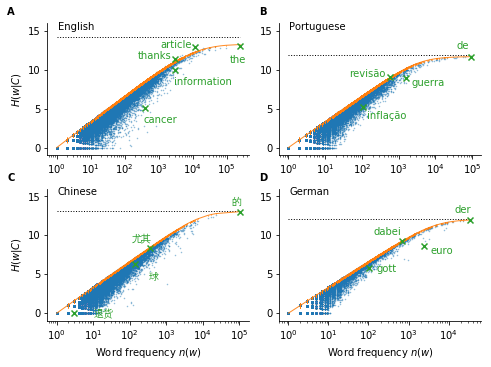

CPU times: user 1min 52s, sys: 1.74 s, total: 1min 54s
Wall time: 1min 52s


In [31]:
%%time

plt.close('all')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=fig_size)

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]


x_annot1 = -0.2
y_annot1 = 1.06

x_annot2 = -0.1
y_annot2 = 1.06

x_annot_text = 0.05
y_annot_text = 0.95

ymin,ymax=-1,16.

###########
# en
###########

# ax1.plot(x_list_en, upper_limit_list_en,  lw=1,  color=set_gray, rasterized=1)
ax1.plot([np.min(word_count_array_en),np.max(word_count_array_en)], [upper_limit_en,upper_limit_en],  lw=1, ls=':',  color='black')


ax1.plot(word_count_array_en, info_real_array_en, ms=.5, lw=0, marker='o', color=set_blue, alpha=0.5, rasterized=1,zorder=1)
ax1.errorbar(word_count_array_en, info_mean_array_en, yerr=yerr_array_en, color=set_orange, lw=1, alpha=0.9, rasterized=1,zorder=2)


# for tmp_id, tmp_word in enumerate(chosen_word_list_en):
#     ax1.scatter(chosen_word_dict_en[tmp_word]['word_count'], chosen_word_dict_en[tmp_word]['info_real'], marker='d', facecolors=set_green,)
#     ax1.text(chosen_word_dict_en[tmp_word]['word_count']*x_factor_list_en[tmp_id], chosen_word_dict_en[tmp_word]['info_real']+y_factor_list_en[tmp_id], tmp_word, color=set_green)
    
for tmp_id, tmp_word in enumerate(chosen_word_list_en):
    ax1.scatter(chosen_word_dict_en[tmp_word]['word_count'], chosen_word_dict_en[tmp_word]['info_real'], marker='x', facecolors=set_green,zorder=3)
    ax1.text(chosen_word_dict_en[tmp_word]['word_count']*x_factor_list_en[tmp_id], chosen_word_dict_en[tmp_word]['info_real']+y_factor_list_en[tmp_id], tmp_word, color=set_green)
    
# ax1.text(0.05, 0.6, '(a) English', horizontalalignment='left', verticalalignment='bottom', transform = ax1.transAxes)
# ax1.text(-0.08, 1,'(a)', horizontalalignment='right', verticalalignment='bottom', transform = ax1.transAxes)

# ax1.annotate(r'\textbf{A}',xy=(x_annot1,y_annot1),xycoords = 'axes fraction')
ax1.annotate(r'A',xy=(x_annot1,y_annot1),xycoords = 'axes fraction',fontweight='bold')
ax1.annotate('English',xy=(x_annot_text,y_annot_text),xycoords = 'axes fraction')

ax1.set_xscale("log")

# ax1.set_xlabel('Word frequency $n(w)$')
ax1.set_ylabel('$H(w|C)$')

ax1.set_yticks(y_lable_list)
ax1.set_yticklabels(y_lable_list, visible=1)
# ax1.set_ylim([-1, 16])
ax1.set_ylim(ymin,ymax)


###########
# pt
###########

# ax2.plot(x_list_pt, upper_limit_list_pt,  lw=1,  color=set_gray, rasterized=1)
ax2.plot([np.min(word_count_array_pt),np.max(word_count_array_pt)], [upper_limit_pt,upper_limit_pt],  lw=1, ls=':',  color='black')


ax2.plot(word_count_array_pt, info_real_array_pt, ms=.5, lw=0, marker='o', color=set_blue, alpha=0.5, rasterized=1,zorder=1)
ax2.errorbar(word_count_array_pt, info_mean_array_pt, yerr=yerr_array_pt, color=set_orange, lw=1, alpha=0.9, rasterized=1,zorder=2)

for tmp_id, tmp_word in enumerate(chosen_word_list_pt):
    ax2.scatter(chosen_word_dict_pt[tmp_word]['word_count'], chosen_word_dict_pt[tmp_word]['info_real'], marker='x', facecolors=set_green,zorder=3)
    ax2.text(chosen_word_dict_pt[tmp_word]['word_count']*x_factor_list_pt[tmp_id], chosen_word_dict_pt[tmp_word]['info_real']+y_factor_list_pt[tmp_id], tmp_word, color=set_green)

# ax2.text(0.05, 0.6, '(b)Portuguese', horizontalalignment='left', verticalalignment='bottom', transform = ax2.transAxes)
# ax2.annotate(r'\textbf{B}',xy=(x_annot2,y_annot2),xycoords = 'axes fraction')
ax2.annotate(r'B',xy=(x_annot2,y_annot2),xycoords = 'axes fraction',fontweight='bold')
ax2.annotate('Portuguese',xy=(x_annot_text,y_annot_text),xycoords = 'axes fraction')

ax2.set_xscale("log")

ax2.set_yticks(y_lable_list)
ax2.set_yticklabels(y_lable_list, visible=1)
# ax2.set_ylim([-1, 16])
ax2.set_ylim(ymin,ymax)

###########
# cn
###########

# # ax3.plot(x_list_cn, upper_limit_list_cn,  lw=1,  color=set_gray, rasterized=1)
ax3.plot([np.min(word_count_array_cn),np.max(word_count_array_cn)], [upper_limit_cn,upper_limit_cn],  lw=1, ls=':',  color='black')


ax3.plot(word_count_array_cn, info_real_array_cn, ms=.5, lw=0, marker='o', color=set_blue, alpha=0.5, rasterized=1,zorder=1)
ax3.errorbar(word_count_array_cn, info_mean_array_cn, yerr=yerr_array_cn, color=set_orange, lw=1, alpha=0.9, rasterized=1,zorder=2)

for tmp_id, tmp_word in enumerate(chosen_word_list_cn):
    ax3.scatter(chosen_word_dict_cn[tmp_word]['word_count'], chosen_word_dict_cn[tmp_word]['info_real'], marker='x', facecolors=set_green,zorder=3)
#     ax3.text(chosen_word_dict_cn[tmp_word]['word_count']*x_factor_list_cn[tmp_id], chosen_word_dict_cn[tmp_word]['info_real']+y_factor_list_cn[tmp_id], tmp_word, color=set_green, fontname = font_cn)
    ax3.text(chosen_word_dict_cn[tmp_word]['word_count']*x_factor_list_cn[tmp_id], chosen_word_dict_cn[tmp_word]['info_real']+y_factor_list_cn[tmp_id], tmp_word, color=set_green, fontproperties = font_cn)

#     ax3.text(chosen_word_dict_cn[tmp_word]['word_count']*x_factor_list_cn[tmp_id], chosen_word_dict_cn[tmp_word]['info_real']+y_factor_list_cn[tmp_id], s=u'测试', color=set_green, fontname = font_cn)

    
    print(tmp_word)
    s = tmp_word
# ax3.text(0.05, 0.6, '(c) Chinese', horizontalalignment='left', verticalalignment='bottom', transform = ax3.transAxes)
# ax3.annotate(r'\textbf{C}',xy=(x_annot1,y_annot1),xycoords = 'axes fraction')
ax3.annotate(r'C',xy=(x_annot1,y_annot1),xycoords = 'axes fraction',fontweight='bold')
ax3.annotate('Chinese',xy=(x_annot_text,y_annot_text),xycoords = 'axes fraction')

    
ax3.set_xscale("log")
ax3.set_xlabel('Word frequency $n(w)$')
ax3.set_ylabel('$H(w|C)$')

ax3.set_yticks(y_lable_list)
ax3.set_yticklabels(y_lable_list, visible=1)
ax3.set_ylim(ymin,ymax)

###########
# de
###########

# ax4.plot(x_list_de, upper_limit_list_de,  lw=1,  color=set_gray, rasterized=1)
ax4.plot([np.min(word_count_array_de),np.max(word_count_array_de)], [upper_limit_de,upper_limit_de],  lw=1, ls=':',  color='black')


ax4.plot(word_count_array_de, info_real_array_de, ms=.5, lw=0, marker='o', color=set_blue, alpha=0.5, rasterized=1,zorder=1)
ax4.errorbar(word_count_array_de, info_mean_array_de, yerr=yerr_array_de, color=set_orange, lw=1, alpha=0.9, rasterized=1,zorder=2)

for tmp_id, tmp_word in enumerate(chosen_word_list_de):
    ax4.scatter(chosen_word_dict_de[tmp_word]['word_count'], chosen_word_dict_de[tmp_word]['info_real'], marker='x', facecolors=set_green,zorder=3)
    ax4.text(chosen_word_dict_de[tmp_word]['word_count']*x_factor_list_de[tmp_id], chosen_word_dict_de[tmp_word]['info_real']+y_factor_list_de[tmp_id], tmp_word, color=set_green)

    
# ax4.text(0.05, 0.6, '(d) German', horizontalalignment='left', verticalalignment='bottom', transform = ax4.transAxes)


# ax4.annotate(r'\textbf{D}',xy=(x_annot2,y_annot2),xycoords = 'axes fraction')
ax4.annotate(r'D',xy=(x_annot2,y_annot2),xycoords = 'axes fraction',fontweight='bold')
ax4.annotate('German',xy=(x_annot_text,y_annot_text),xycoords = 'axes fraction')


ax4.set_xscale("log")
ax4.set_xlabel('Word frequency $n(w)$')

ax4.set_yticks(y_lable_list)
ax4.set_yticklabels(y_lable_list, visible=1)

ax4.set_ylim(ymin,ymax)

###########
# end
###########


plt.subplots_adjust(wspace=.15, hspace=0.25)

plt.show()
plt.close()


# fig_name = 'figure_01_v3.png'
# tmp_folder_file_full_path = os.path.join(os.pardir,'figures', fig_name)
# fig.savefig(tmp_folder_file_full_path, bbox_inches='tight', transparent=0,dpi=300)
fig_name = 'figure_01_v3.pdf'
tmp_folder_file_full_path = os.path.join(os.pardir,'figures', fig_name)
fig.savefig(tmp_folder_file_full_path, bbox_inches='tight', transparent=0,dpi=300)
